https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff

In [65]:
data = arff.loadarff('data/1year.arff')
df = pd.DataFrame(data[0])

data = arff.loadarff('data/2year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

data = arff.loadarff('data/3year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

data = arff.loadarff('data/4year.arff')
df1 = pd.DataFrame(data[0])
df = pd.concat([df, df1])

df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.000000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.000000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.149880,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.187320,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,b'1'
9788,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,b'1'
9789,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,b'1'
9790,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,b'1'


In [66]:
list(df.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('floa

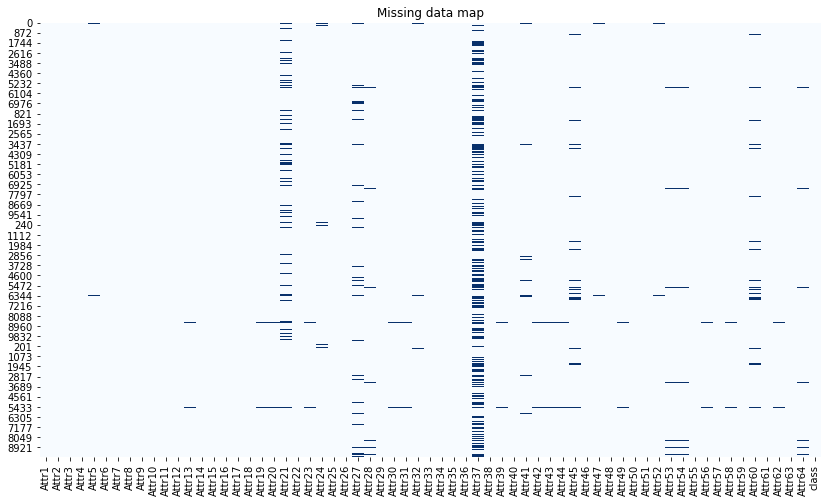

In [67]:
plt.figure(figsize=(14,8))
sns.heatmap(df.isna(), cbar=False, cmap="Blues").set_title("Missing data map")
plt.show()

In [68]:
df['class'] = df['class'].astype('int')

In [69]:
df['class'].unique()

array([0, 1])

In [70]:
df['class'].value_counts()

0    35814
1     1681
Name: class, dtype: int64

In [72]:
# Percentage of missing values per column
nan_perc = df.loc[df['class']==1].isna().sum()/len(df.index)*100
nan_perc.sort_values(ascending=False).head(10)

Attr37    2.045606
Attr27    1.578877
Attr21    1.376183
Attr45    0.368049
Attr60    0.368049
Attr28    0.162688
Attr64    0.162688
Attr54    0.162688
Attr53    0.162688
Attr11    0.096013
dtype: float64

In [73]:
df.drop(columns=['Attr37', 'Attr27', 'Attr21','Attr45', 'Attr60'], inplace=True)

In [74]:
df.dropna(inplace=True)

In [75]:
df['class'].value_counts()

0    33394
1     1564
Name: class, dtype: int64

In [76]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [77]:
X = df.drop('class', axis=1)
y = df['class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [80]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()